In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing

# Reading and preparing data

In [2]:
# dataset https://www.kaggle.com/joshmcadams/oranges-vs-grapefruit
df = pd.read_csv('citrus.csv')

In [3]:
print(df.shape)
df.head()

(10000, 6)


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [4]:
df.columns = ['class' if column == 'name' else column for column in df.columns]
df['class'].replace({'orange':0, 'grapefruit':1}, inplace=True)

In [5]:
print(f'Number of duplicated rows is {df.duplicated().sum()}')
print(f"Number of oranges: {sum(df['class']==0)}\nNumber of grapefruit: {sum(df['class']==1)}") 

Number of duplicated rows is 0
Number of oranges: 5000
Number of grapefruit: 5000


In [6]:
df.head()

,class,diameter,weight,red,green,blue
0,0,2.96,86.76,172,85,2
1,0,3.91,88.05,166,78,3
2,0,4.42,95.17,156,81,2
3,0,4.47,95.60,163,81,4
4,0,4.48,95.76,161,72,9


In [7]:
df.describe()

,class,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500000,9.975685,175.050792,153.847800,76.010600,11.363200
std,0.500025,1.947844,29.212119,10.432954,11.708433,9.061275
min,0.000000,2.960000,86.760000,115.000000,31.000000,2.000000
25%,0.000000,8.460000,152.220000,147.000000,68.000000,2.000000
50%,0.500000,9.980000,174.985000,154.000000,76.000000,10.000000
75%,1.000000,11.480000,197.722500,161.000000,84.000000,17.000000
max,1.000000,16.450000,261.510000,192.000000,116.000000,56.000000


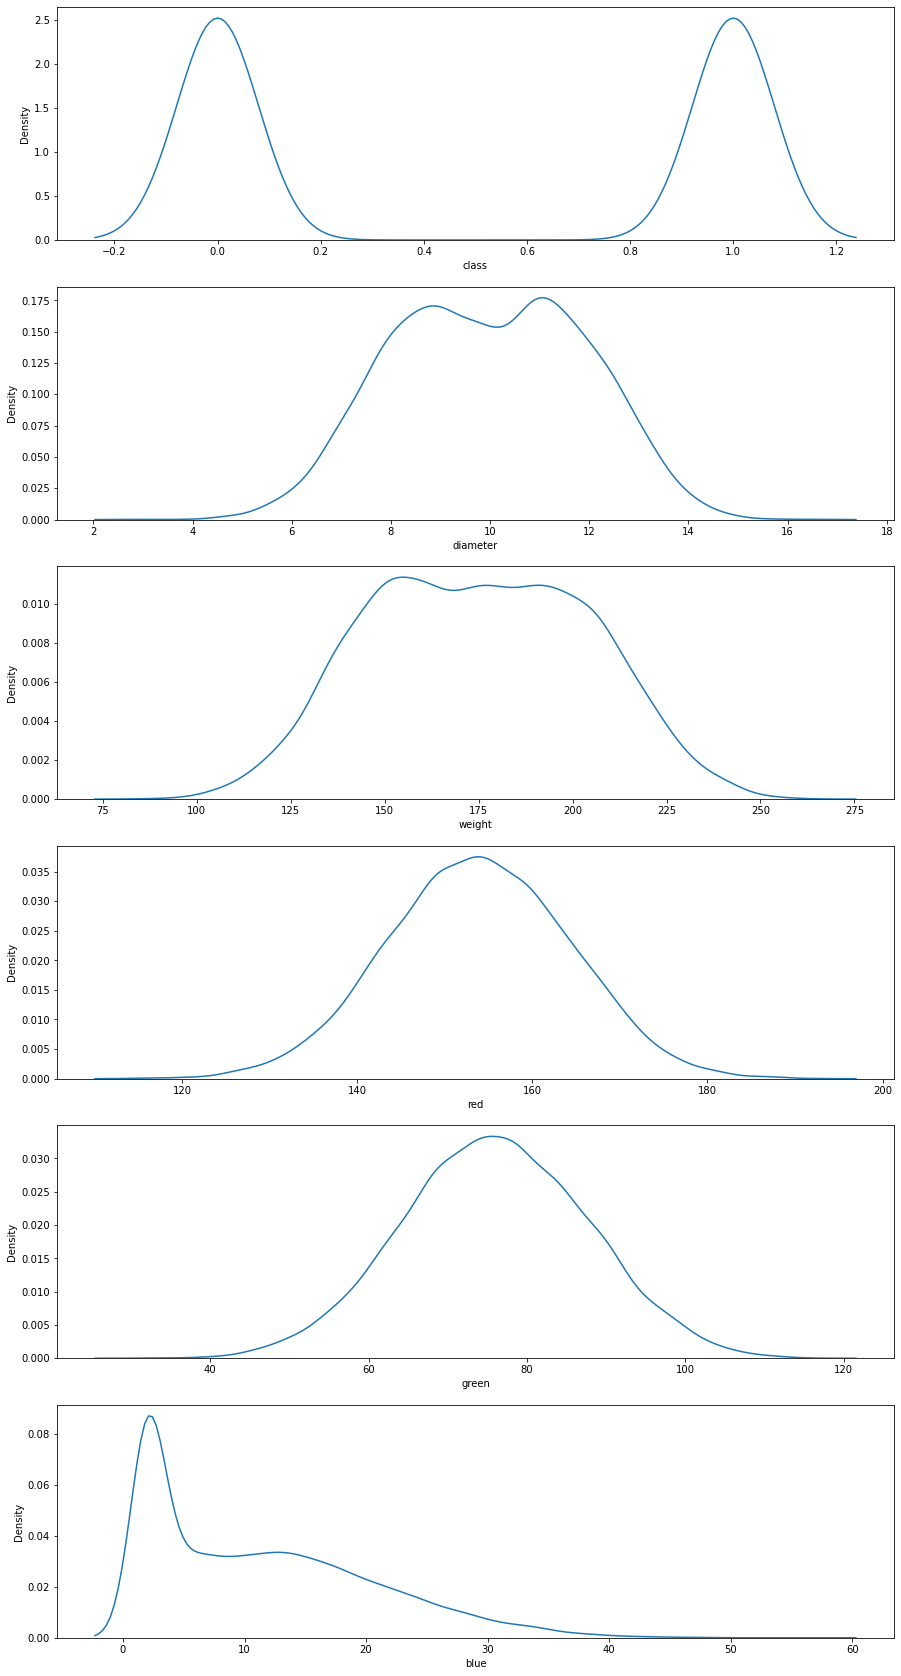

In [8]:
all_cols = list(df.columns)
plt.figure(figsize=(15,30))
for i, column in enumerate(all_cols): 
    ax = plt.subplot(len(all_cols), 1, i+1)
    sns.kdeplot(df[column], ax=ax)

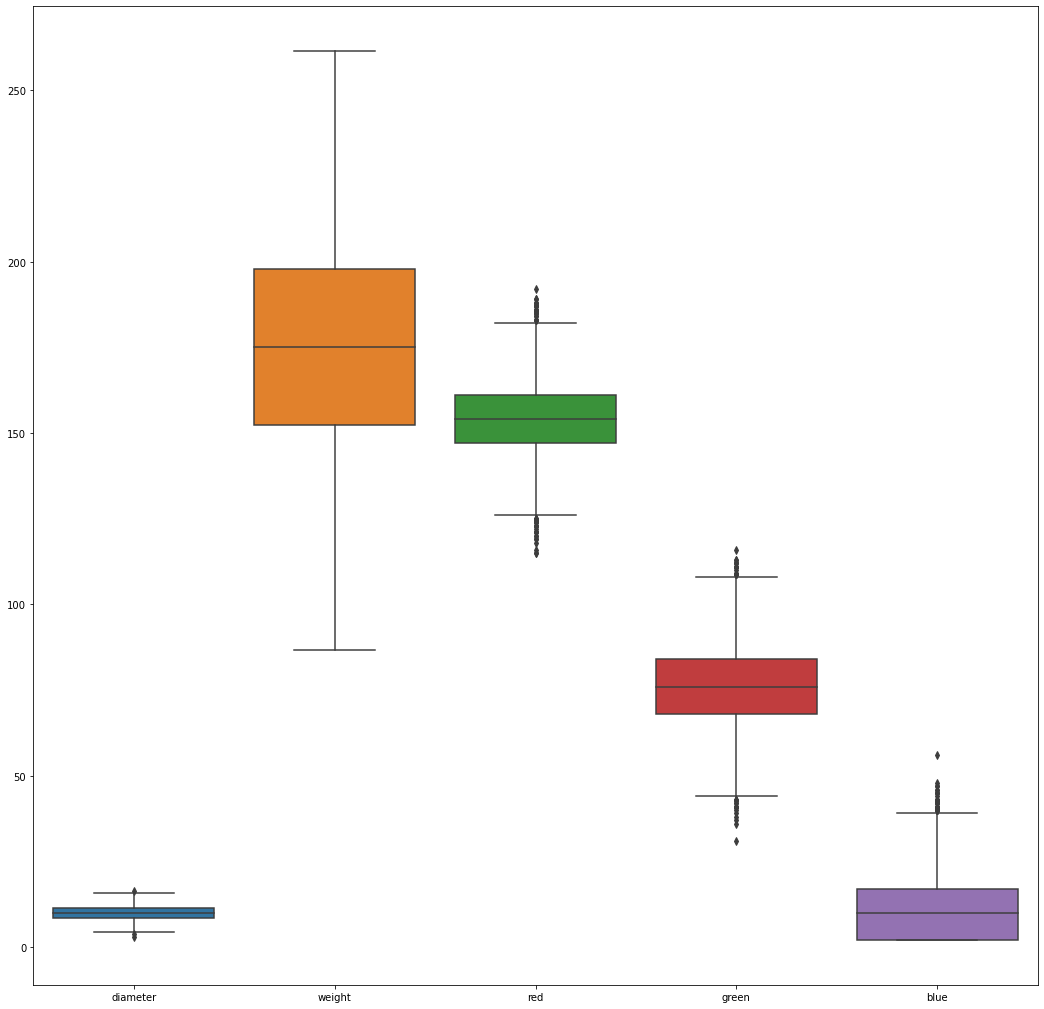

In [10]:
plt.figure(figsize=(18,18))
sns.boxplot(data=df.drop('class', axis=1))
plt.show()

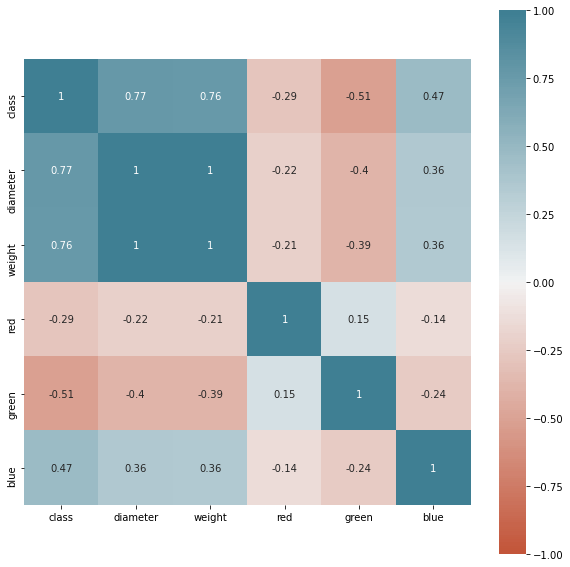

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, ax=ax, annot=True)

In [12]:
def prep_data(df: pd.DataFrame, test_size: int = 0.3):
    X = df.drop('class', axis=1)
    y = df['class']

    min_max_scaler = MinMaxScaler()
    color_columns = ['red', 'green', 'blue']
    columns = set(X.columns).difference(color_columns)
    X = pd.DataFrame(min_max_scaler.fit_transform(X[columns]), columns=columns)
    X[color_columns] = df[color_columns] / 255

    return train_test_split(X, y, test_size=test_size)

In [13]:
def score_model(model, X_test, y_test):
    test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(f"Loss: {test_loss}")
    print(f"Accuracy: {test_acc}")
    print(f"Classification report:\n{classification_report(y_test, y_pred)}")


    history_dict = history.history
    acc = history_dict['binary_accuracy']
    loss = history_dict['loss']

    epochs = range(1, len(acc) + 1)
    fig = plt.figure(figsize=(18,18))
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, acc, 'b', label='Accuracy')
    plt.title('Training loss and accuracy')
    plt.xlabel('Epochs')
    plt.legend()

    plt.show()

## All columns

In [14]:
X_train, X_test, y_train, y_test = prep_data(df)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=losses.BinaryCrossentropy(from_logits=True),
              metrics=tf.metrics.BinaryAccuracy(threshold=0.5))

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 756us/step - loss: 0.6735 - binary_accuracy: 0.5084
Epoch 2/100
219/219 [==============================] - 0s 757us/step - loss: 0.6194 - binary_accuracy: 0.5761
Epoch 3/100
219/219 [==============================] - 0s 787us/step - loss: 0.5194 - binary_accuracy: 0.8541
Epoch 4/100
219/219 [==============================] - 0s 751us/step - loss: 0.3992 - binary_accuracy: 0.8983
Epoch 5/100
219/219 [==============================] - 0s 761us/step - loss: 0.3204 - binary_accuracy: 0.8984
Epoch 6/100
219/219 [==============================] - 0s 753us/step - loss: 0.2629 - binary_accuracy: 0.9071
Epoch 7/100
219/219 [==============================] - 0s 744us/step - loss: 0.2431 - binary_accuracy: 0.9057
Epoch 8/100
219/219 [==============================] - 0s 729us/step - loss: 0.2288 - binary_accuracy: 0.9036
Epoch 9/100
219/219 [==============================] - 0s 739us/step - loss: 0.2065 - binary_accuracy: 0.9145
Epoch 10/1

219/219 [==============================] - 0s 753us/step - loss: 0.1837 - binary_accuracy: 0.9187
Epoch 75/100
219/219 [==============================] - 0s 741us/step - loss: 0.1901 - binary_accuracy: 0.9218
Epoch 76/100
219/219 [==============================] - 0s 734us/step - loss: 0.1886 - binary_accuracy: 0.9140
Epoch 77/100
219/219 [==============================] - 0s 732us/step - loss: 0.1881 - binary_accuracy: 0.9169
Epoch 78/100
219/219 [==============================] - 0s 710us/step - loss: 0.1787 - binary_accuracy: 0.9190
Epoch 79/100
219/219 [==============================] - 0s 739us/step - loss: 0.1818 - binary_accuracy: 0.9231
Epoch 80/100
219/219 [==============================] - 0s 725us/step - loss: 0.1863 - binary_accuracy: 0.9172
Epoch 81/100
219/219 [==============================] - 0s 737us/step - loss: 0.1821 - binary_accuracy: 0.9218
Epoch 82/100
219/219 [==============================] - 0s 729us/step - loss: 0.1781 - binary_accuracy: 0.9226
Epoch 83/100
2

94/94 - 0s - loss: 0.1844 - binary_accuracy: 0.9253
Loss: 0.18437263369560242
Accuracy: 0.9253333210945129
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1505
           1       0.95      0.90      0.92      1495

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



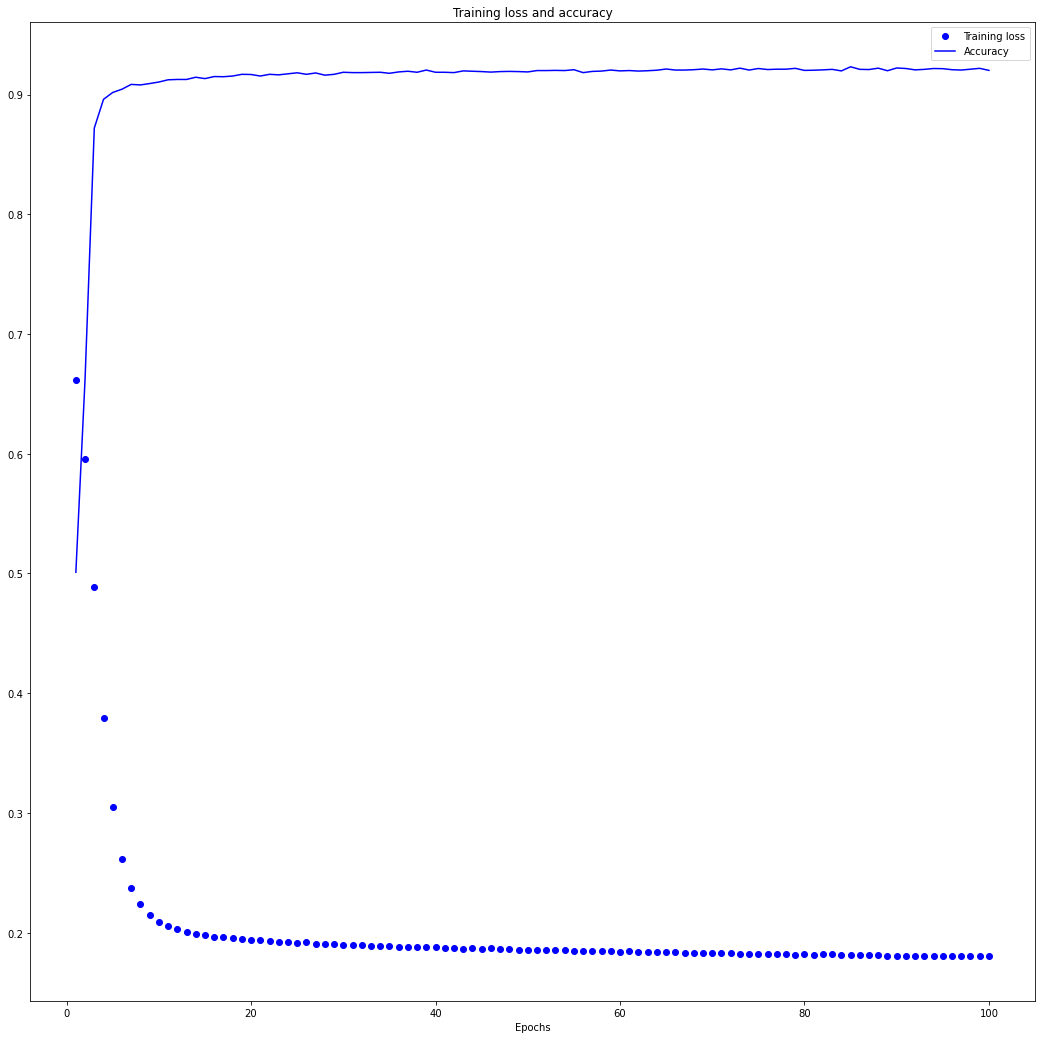

In [16]:
score_model(model, X_test, y_test)

## Without diameter

In [17]:
X_train, X_test, y_train, y_test = prep_data(df.drop('diameter', axis=1))

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=losses.BinaryCrossentropy(from_logits=True),
              metrics=tf.metrics.BinaryAccuracy(threshold=0.5))

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 751us/step - loss: 0.6742 - binary_accuracy: 0.5050
Epoch 2/100
219/219 [==============================] - 0s 757us/step - loss: 0.6239 - binary_accuracy: 0.5862
Epoch 3/100
219/219 [==============================] - 0s 759us/step - loss: 0.5462 - binary_accuracy: 0.8475
Epoch 4/100
219/219 [==============================] - 0s 782us/step - loss: 0.4643 - binary_accuracy: 0.8935
Epoch 5/100
219/219 [==============================] - 0s 748us/step - loss: 0.4047 - binary_accuracy: 0.8999
Epoch 6/100
219/219 [==============================] - 0s 760us/step - loss: 0.3591 - binary_accuracy: 0.9085 0s - loss: 0.3601 - binary_accuracy: 0.908
Epoch 7/100
219/219 [==============================] - 0s 763us/step - loss: 0.3209 - binary_accuracy: 0.9081
Epoch 8/100
219/219 [==============================] - 0s 779us/step - loss: 0.3068 - binary_accuracy: 0.9036
Epoch 9/100
219/219 [==============================] - 0s 743us/step - loss: 

219/219 [==============================] - 0s 733us/step - loss: 0.1825 - binary_accuracy: 0.9241
Epoch 75/100
219/219 [==============================] - 0s 724us/step - loss: 0.2003 - binary_accuracy: 0.9163
Epoch 76/100
219/219 [==============================] - 0s 743us/step - loss: 0.1897 - binary_accuracy: 0.9199
Epoch 77/100
219/219 [==============================] - 0s 731us/step - loss: 0.2009 - binary_accuracy: 0.9168
Epoch 78/100
219/219 [==============================] - 0s 743us/step - loss: 0.1926 - binary_accuracy: 0.9163
Epoch 79/100
219/219 [==============================] - 0s 785us/step - loss: 0.1997 - binary_accuracy: 0.9172
Epoch 80/100
219/219 [==============================] - 0s 775us/step - loss: 0.1926 - binary_accuracy: 0.9167
Epoch 81/100
219/219 [==============================] - 0s 761us/step - loss: 0.1925 - binary_accuracy: 0.9236
Epoch 82/100
219/219 [==============================] - 0s 752us/step - loss: 0.1906 - binary_accuracy: 0.9183
Epoch 83/100
2

94/94 - 0s - loss: 0.1771 - binary_accuracy: 0.9313
Loss: 0.177094966173172
Accuracy: 0.9313333630561829
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1490
           1       0.95      0.92      0.93      1510

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



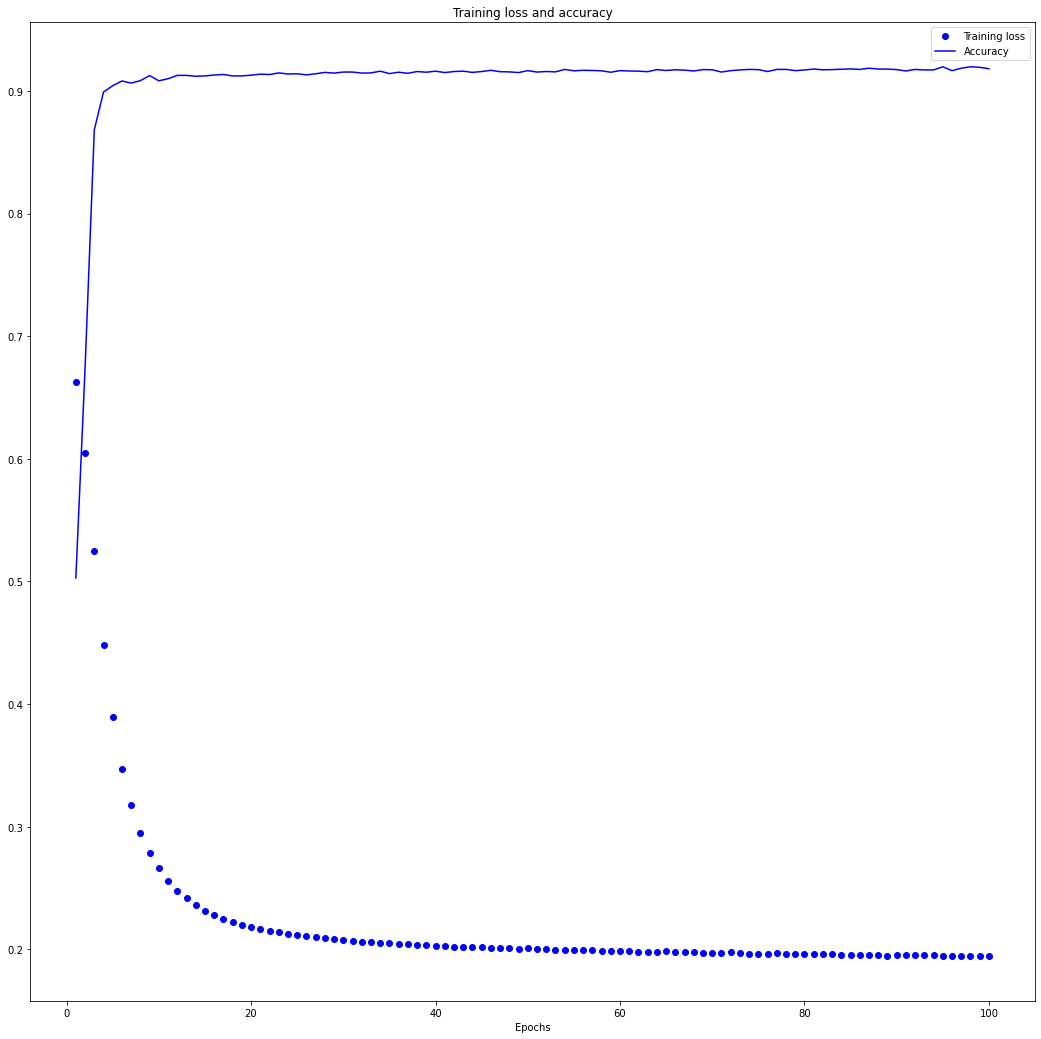

In [19]:
score_model(model, X_test, y_test)

## Hinge loss function without diameter

In [20]:
X_train, X_test, y_train, y_test = prep_data(df.drop('diameter', axis=1))

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=losses.Hinge(),
              metrics=tf.metrics.BinaryAccuracy(threshold=0.5))

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 823us/step - loss: 0.9985 - binary_accuracy: 0.4914
Epoch 2/100
219/219 [==============================] - 0s 802us/step - loss: 0.9725 - binary_accuracy: 0.5023
Epoch 3/100
219/219 [==============================] - 0s 698us/step - loss: 0.8435 - binary_accuracy: 0.7628
Epoch 4/100
219/219 [==============================] - 0s 751us/step - loss: 0.6578 - binary_accuracy: 0.9110
Epoch 5/100
219/219 [==============================] - 0s 760us/step - loss: 0.5509 - binary_accuracy: 0.9057
Epoch 6/100
219/219 [==============================] - 0s 780us/step - loss: 0.4469 - binary_accuracy: 0.8951
Epoch 7/100
219/219 [==============================] - 0s 754us/step - loss: 0.3468 - binary_accuracy: 0.8881
Epoch 8/100
219/219 [==============================] - 0s 744us/step - loss: 0.2458 - binary_accuracy: 0.8930
Epoch 9/100
219/219 [==============================] - 0s 745us/step - loss: 0.2263 - binary_accuracy: 0.8888
Epoch 10/1

219/219 [==============================] - 0s 794us/step - loss: 0.1863 - binary_accuracy: 0.9116
Epoch 75/100
219/219 [==============================] - 0s 733us/step - loss: 0.1762 - binary_accuracy: 0.9203
Epoch 76/100
219/219 [==============================] - 0s 768us/step - loss: 0.1673 - binary_accuracy: 0.9214
Epoch 77/100
219/219 [==============================] - 0s 780us/step - loss: 0.1571 - binary_accuracy: 0.9227
Epoch 78/100
219/219 [==============================] - 0s 788us/step - loss: 0.1591 - binary_accuracy: 0.9235
Epoch 79/100
219/219 [==============================] - 0s 745us/step - loss: 0.1641 - binary_accuracy: 0.9201
Epoch 80/100
219/219 [==============================] - 0s 752us/step - loss: 0.1683 - binary_accuracy: 0.9210
Epoch 81/100
219/219 [==============================] - 0s 753us/step - loss: 0.1679 - binary_accuracy: 0.9184
Epoch 82/100
219/219 [==============================] - 0s 740us/step - loss: 0.1674 - binary_accuracy: 0.9190
Epoch 83/100
2

94/94 - 0s - loss: 0.1557 - binary_accuracy: 0.9273
Loss: 0.15568752586841583
Accuracy: 0.9273333549499512
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1523
           1       0.95      0.90      0.92      1477

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



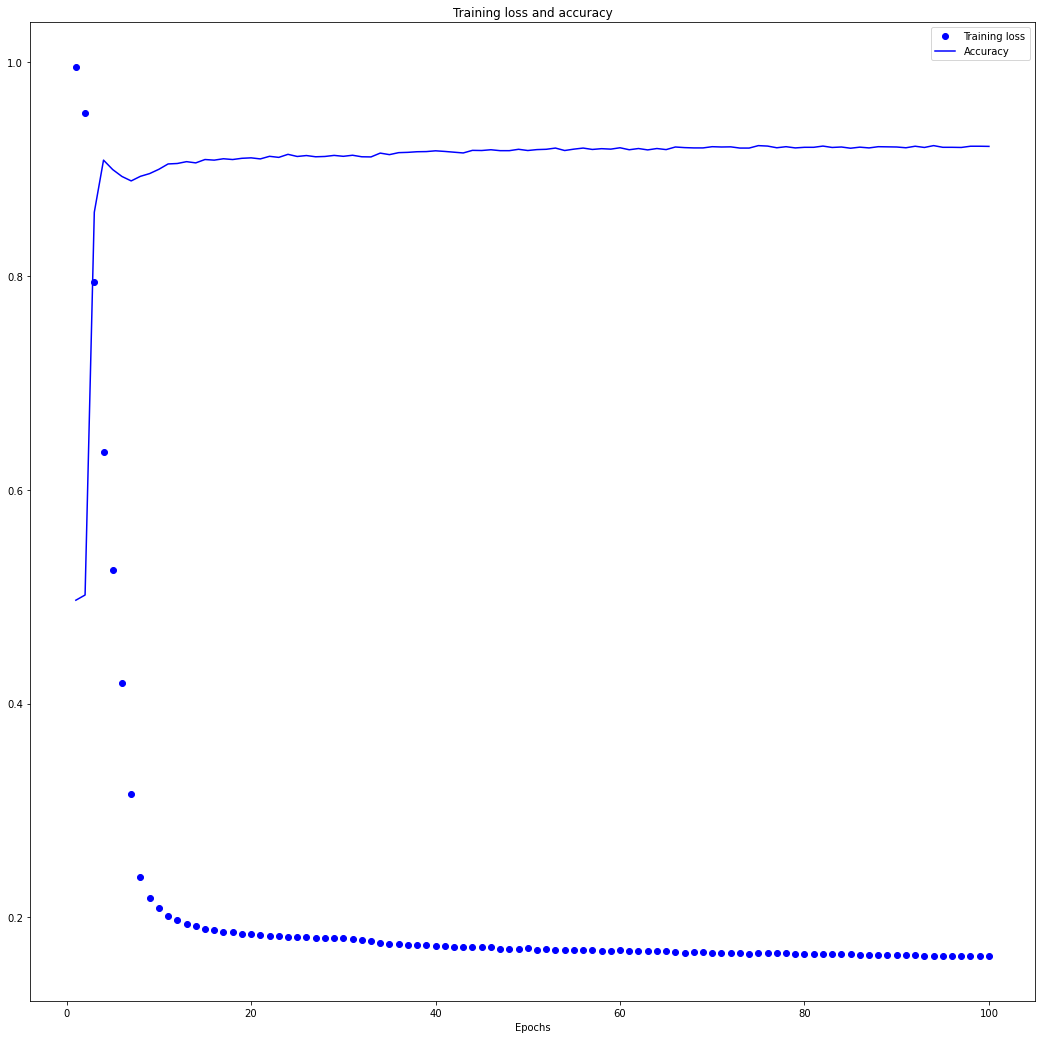

In [22]:
score_model(model, X_test, y_test)

## Different architecture

In [23]:
X_train, X_test, y_train, y_test = prep_data(df.drop('diameter', axis=1))

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=losses.Hinge(),
              metrics=tf.metrics.BinaryAccuracy(threshold=0.5))

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 833us/step - loss: 0.9721 - binary_accuracy: 0.4930
Epoch 2/100
219/219 [==============================] - 0s 862us/step - loss: 0.7741 - binary_accuracy: 0.5052
Epoch 3/100
219/219 [==============================] - 0s 904us/step - loss: 0.5684 - binary_accuracy: 0.4974
Epoch 4/100
219/219 [==============================] - 0s 827us/step - loss: 0.4357 - binary_accuracy: 0.5794
Epoch 5/100
219/219 [==============================] - 0s 782us/step - loss: 0.3249 - binary_accuracy: 0.8782
Epoch 6/100
219/219 [==============================] - 0s 799us/step - loss: 0.2219 - binary_accuracy: 0.9035
Epoch 7/100
219/219 [==============================] - 0s 796us/step - loss: 0.1927 - binary_accuracy: 0.9085
Epoch 8/100
219/219 [==============================] - 0s 783us/step - loss: 0.1826 - binary_accuracy: 0.9109
Epoch 9/100
219/219 [==============================] - 0s 828us/step - loss: 0.1706 - binary_accuracy: 0.9163
Epoch 10/1

219/219 [==============================] - ETA: 0s - loss: 0.1500 - binary_accuracy: 0.925 - 0s 811us/step - loss: 0.1507 - binary_accuracy: 0.9250
Epoch 75/100
219/219 [==============================] - 0s 849us/step - loss: 0.1597 - binary_accuracy: 0.9216
Epoch 76/100
219/219 [==============================] - 0s 811us/step - loss: 0.1532 - binary_accuracy: 0.9264
Epoch 77/100
219/219 [==============================] - 0s 845us/step - loss: 0.1568 - binary_accuracy: 0.9216 0s - loss: 0.1520 - binary_accuracy: 0.9
Epoch 78/100
219/219 [==============================] - 0s 837us/step - loss: 0.1534 - binary_accuracy: 0.9255
Epoch 79/100
219/219 [==============================] - 0s 816us/step - loss: 0.1439 - binary_accuracy: 0.9299
Epoch 80/100
219/219 [==============================] - 0s 828us/step - loss: 0.1622 - binary_accuracy: 0.9210
Epoch 81/100
219/219 [==============================] - 0s 860us/step - loss: 0.1486 - binary_accuracy: 0.9266
Epoch 82/100
219/219 [============

94/94 - 0s - loss: 0.1515 - binary_accuracy: 0.9237
Loss: 0.15149527788162231
Accuracy: 0.9236666560173035
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1496
           1       0.94      0.90      0.92      1504

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



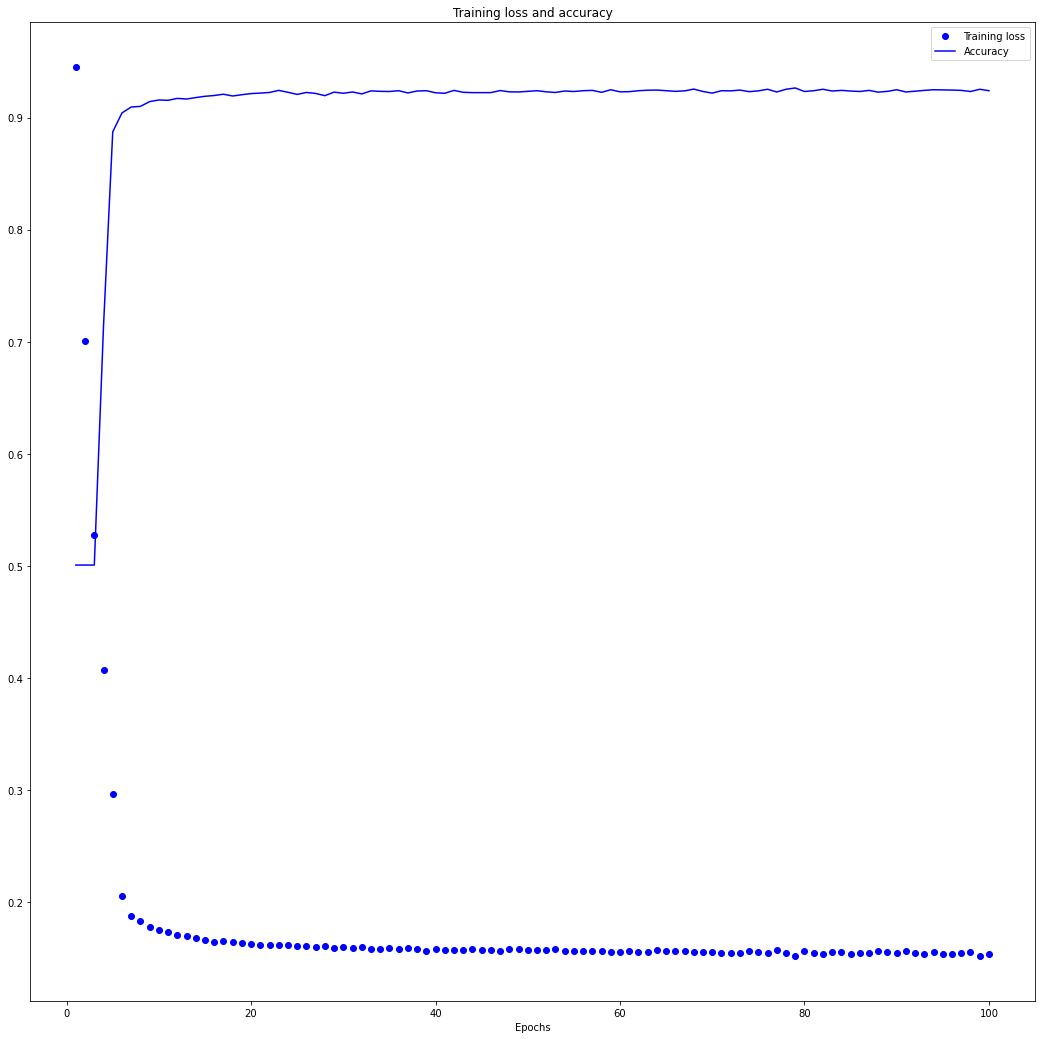

In [25]:
score_model(model, X_test, y_test)